In [215]:
import numpy as np
import pandas as pd

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [262]:
df = pd.read_csv('diabetes_data2.csv')

In [263]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [265]:
dfpos=df[df["class"]==1]

In [266]:
dfpos.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [267]:
dfpos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 517
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 320 non-null    int64 
 1   gender              320 non-null    object
 2   polyuria            320 non-null    int64 
 3   polydipsia          320 non-null    int64 
 4   sudden_weight_loss  320 non-null    int64 
 5   weakness            320 non-null    int64 
 6   polyphagia          320 non-null    int64 
 7   genital_thrush      320 non-null    int64 
 8   visual_blurring     320 non-null    int64 
 9   itching             320 non-null    int64 
 10  irritability        320 non-null    int64 
 11  delayed_healing     320 non-null    int64 
 12  partial_paresis     320 non-null    int64 
 13  muscle_stiffness    320 non-null    int64 
 14  alopecia            320 non-null    int64 
 15  obesity             320 non-null    int64 
 16  class               320 no

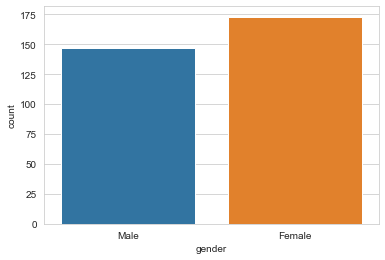

In [268]:
sns.countplot(x ='gender', data = dfpos)

In [270]:
dfpos2=dfpos.groupby('age').sum()
dfpos2.reset_index(inplace=True)
dfpos2.head()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,16,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,25,1,1,0,1,2,1,2,1,0,1,0,0,2,0,2
2,28,0,0,0,0,0,0,5,0,0,0,5,5,0,0,5
3,30,7,4,6,5,4,1,0,2,1,6,3,2,0,0,7
4,31,3,2,2,2,3,0,1,2,2,0,3,2,1,0,3


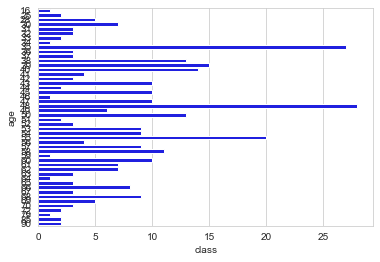

In [324]:
sns.barplot(x="class", y="age", orient = 'h', color="blue", data=dfpos2)

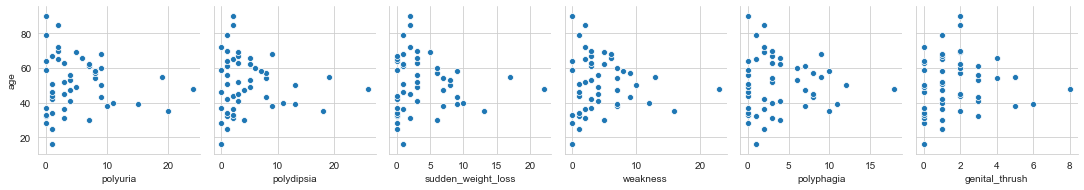

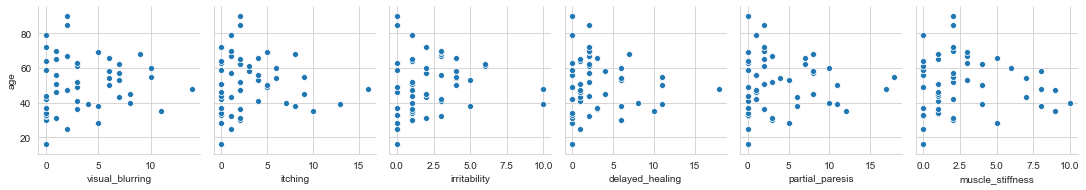

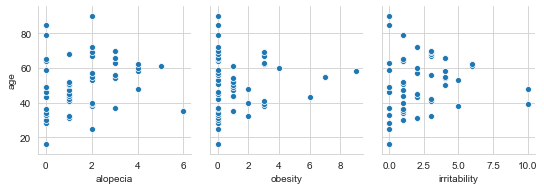

In [305]:
sns.pairplot(data=dfpos2, y_vars="age", x_vars=["polyuria","polydipsia","sudden_weight_loss","weakness","polyphagia","genital_thrush"])
sns.pairplot(data=dfpos2, y_vars="age", x_vars=["visual_blurring","itching","irritability","delayed_healing","partial_paresis","muscle_stiffness"])
sns.pairplot(data=dfpos2, y_vars="age", x_vars=["alopecia","obesity","irritability"])


In [306]:
from sklearn.model_selection import train_test_split

In [308]:
X = df[['irritability', 'obesity', 'partial_paresis','weakness', 'polydipsia']]
y = df['class']

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [310]:
from sklearn.linear_model import LogisticRegression

In [311]:
lm = LogisticRegression()

In [312]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [313]:
predictions = lm.predict(X_test)